In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

Le but de ce notebook est, maintenant que nous avons choisi le modèle (Random Forest), de l'implémenter sur nos prédictions d'IFM pour prédire les feux en été sur la période 2023 - 2100.

In [2]:
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

X['maille_safran'] = X['maille_safran'].astype(str)
Y['Mailles'] = Y['Mailles'].astype(str)
Y.rename(columns={'Mailles': 'maille_safran', 'Année': 'Année'}, inplace=True)

X['maille_safran'] = X['maille_safran'].astype(int)
Y['maille_safran'] = Y['maille_safran'].astype(float).astype(int)

data = pd.merge(X, Y, on=['maille_safran', 'Année'], how='inner')

In [3]:
# Problèmes avec les données de 2021 qui n'était pas binaires
data.loc[data['Feu en été'] > 1, 'Feu en été'] = 1

In [4]:
Xt = data.drop(columns=['Feu en été', 'maille_safran', 'Année'])  
y = data['Feu en été']

In [5]:
# Initialiser et entraîner le meilleur modèle (Random Forest)
best_model = RandomForestClassifier() 
best_model.fit(Xt, y)

RandomForestClassifier()

In [6]:
# Charger les nouvelles données X à prédire
new_X = pd.read_csv('X_projection2100.csv')
X_pred = new_X.loc[new_X['Année']> 2022]
X_pred_ = X_pred.drop(columns=['maille_safran', 'Année']) 
X_pred_

,01 Jun,02 Jun,03 Jun,04 Jun,05 Jun,06 Jun,07 Jun,08 Jun,09 Jun,10 Jun,...,21 Aug,22 Aug,23 Aug,24 Aug,25 Aug,26 Aug,27 Aug,28 Aug,29 Aug,30 Aug
144,8.8,11.1,10.1,12.7,11.0,0.3,1.8,0.9,0.1,0.0,...,8.4,11.2,15.3,13.1,17.3,31.1,0.0,0.0,2.8,6.0
145,8.9,11.9,11.7,15.0,12.8,0.4,1.9,0.9,0.2,0.0,...,9.8,12.7,16.4,15.2,17.3,33.5,0.0,0.0,3.4,7.0
146,10.3,13.5,13.5,14.5,13.6,0.4,0.9,0.8,0.2,0.0,...,12.6,14.4,13.0,14.7,19.0,27.9,0.0,0.0,0.7,5.0
147,7.6,10.4,10.6,12.8,11.8,0.3,1.6,2.6,0.3,0.0,...,8.4,12.3,15.4,13.9,13.7,24.9,0.0,0.0,2.7,6.7
148,8.6,11.4,11.7,14.8,12.8,0.5,2.0,1.0,0.2,0.0,...,9.6,13.1,16.4,15.6,16.0,30.4,0.0,0.0,3.5,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,35.7,38.3,45.2,34.5,44.5,46.6,47.2,41.4,39.6,4.1,...,14.4,13.5,12.3,14.8,23.5,15.4,14.8,12.6,20.3,1.6
11372,33.5,35.6,42.4,31.9,40.9,43.8,44.4,39.4,37.8,4.2,...,11.7,11.9,10.9,13.6,20.5,13.6,13.3,11.7,17.8,0.5
11373,35.9,28.2,29.8,22.3,40.9,44.8,46.3,34.6,26.8,4.4,...,8.2,9.3,9.6,17.6,20.2,14.2,11.3,10.4,14.5,11.8
11374,42.0,31.8,32.1,29.5,47.0,44.6,40.9,41.8,28.2,4.6,...,9.2,13.3,11.1,17.0,19.4,13.7,14.4,12.8,15.5,13.9


In [7]:
# Prédire les y futurs à partir des nouvelles données X
predicted_y = best_model.predict(X_pred_)

# Afficher les prédictions
print("Prédictions des y futurs:", predicted_y)

Prédictions des y futurs: [0 0 0 ... 1 1 1]


In [8]:
# Transposer le vecteur en un vecteur colonne
predicted_y_colonne = predicted_y.reshape(-1, 1)

predicted_y_colonne

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [9]:
# Joindre le vecteur colonne à ton DataFrame X_predit
X_pred['Prédiction de feu en été'] = predicted_y_colonne

# Afficher le DataFrame avec les prédictions
X_pred

/tmp/ipykernel_299/1961226660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred['Prédiction de feu en été'] = predicted_y_colonne


,maille_safran,01 Jun,02 Jun,03 Jun,04 Jun,05 Jun,06 Jun,07 Jun,08 Jun,09 Jun,...,23 Aug,24 Aug,25 Aug,26 Aug,27 Aug,28 Aug,29 Aug,30 Aug,Année,Prédiction de feu en été
144,7741,8.8,11.1,10.1,12.7,11.0,0.3,1.8,0.9,0.1,...,15.3,13.1,17.3,31.1,0.0,0.0,2.8,6.0,2023,0
145,7742,8.9,11.9,11.7,15.0,12.8,0.4,1.9,0.9,0.2,...,16.4,15.2,17.3,33.5,0.0,0.0,3.4,7.0,2023,0
146,7743,10.3,13.5,13.5,14.5,13.6,0.4,0.9,0.8,0.2,...,13.0,14.7,19.0,27.9,0.0,0.0,0.7,5.0,2023,0
147,7823,7.6,10.4,10.6,12.8,11.8,0.3,1.6,2.6,0.3,...,15.4,13.9,13.7,24.9,0.0,0.0,2.7,6.7,2023,0
148,7824,8.6,11.4,11.7,14.8,12.8,0.5,2.0,1.0,0.2,...,16.4,15.6,16.0,30.4,0.0,0.0,3.5,7.2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,8814,35.7,38.3,45.2,34.5,44.5,46.6,47.2,41.4,39.6,...,12.3,14.8,23.5,15.4,14.8,12.6,20.3,1.6,2100,0
11372,8815,33.5,35.6,42.4,31.9,40.9,43.8,44.4,39.4,37.8,...,10.9,13.6,20.5,13.6,13.3,11.7,17.8,0.5,2100,1
11373,8893,35.9,28.2,29.8,22.3,40.9,44.8,46.3,34.6,26.8,...,9.6,17.6,20.2,14.2,11.3,10.4,14.5,11.8,2100,1
11374,8894,42.0,31.8,32.1,29.5,47.0,44.6,40.9,41.8,28.2,...,11.1,17.0,19.4,13.7,14.4,12.8,15.5,13.9,2100,1


In [10]:
predictions = X_pred[['maille_safran', 'Année', 'Prédiction de feu en été']]
predictions

,maille_safran,Année,Prédiction de feu en été
144,7741,2023,0
145,7742,2023,0
146,7743,2023,0
147,7823,2023,0
148,7824,2023,0
...,...,...,...
11371,8814,2100,0
11372,8815,2100,1
11373,8893,2100,1
11374,8894,2100,1


In [11]:
predictions.to_csv('Y_projection2100.csv', index = False)

# Carte des mailles les plus touchées par les feux entre 2023 et 2100

In [24]:
predictions[predictions['maille_safran']==7741]

,maille_safran,Année,Prédiction de feu en été,feux_cumulés
144,7741,2023,0,0
288,7741,2024,1,1
432,7741,2025,1,2
576,7741,2026,1,3
720,7741,2027,0,3
...,...,...,...,...
10656,7741,2096,1,47
10800,7741,2097,1,48
10944,7741,2098,0,48
11088,7741,2099,1,49


In [27]:
df_sum = predictions.groupby(['maille_safran'])['Prédiction de feu en été'].sum()


In [29]:
df_sum

maille_safran
7741    50
7742    51
7743    43
7823    44
7824    46
        ..
8814    43
8815    45
8893    43
8894    41
8896    38
Name: Prédiction de feu en été, Length: 144, dtype: int64

In [31]:
df_final = pd.DataFrame()
df_final['nb de feux']=df_sum

In [32]:
df_final

,nb de feux
maille_safran,
7741,50
7742,51
7743,43
7823,44
7824,46
...,...
8814,43
8815,45
8893,43


In [36]:
import matplotlib.pyplot as plt

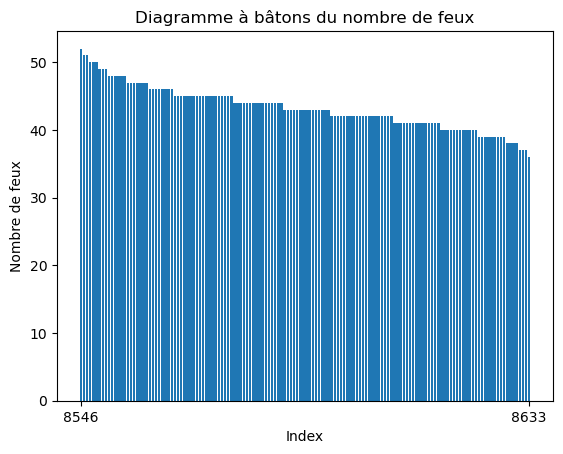

In [43]:
df_final = df_final.sort_values(by='nb de feux', ascending = False)

# Obtenir l'index de la valeur maximale et minimale
max_index = df_final['nb de feux'].idxmax()
min_index = df_final['nb de feux'].idxmin()

# Créer le diagramme à bâtons
plt.bar(range(len(df_final)), df_final['nb de feux'])

# Définir les étiquettes d'abscisse pour les valeurs maximale et minimale uniquement
plt.xticks([0, len(df_final)-1], [min_index, max_index])

# Ajouter des labels et un titre
plt.xlabel('Index')
plt.ylabel('Nombre de feux')
plt.title('Diagramme à bâtons du nombre de feux')

# Afficher le diagramme
plt.show()

In [54]:
df_mailles = pd.read_csv('mailles_polygons.csv')
df_communes = pd.read_csv('communes_landes.csv')

AttributeError: 'DataFrame' object has no attribute 'to_crs'

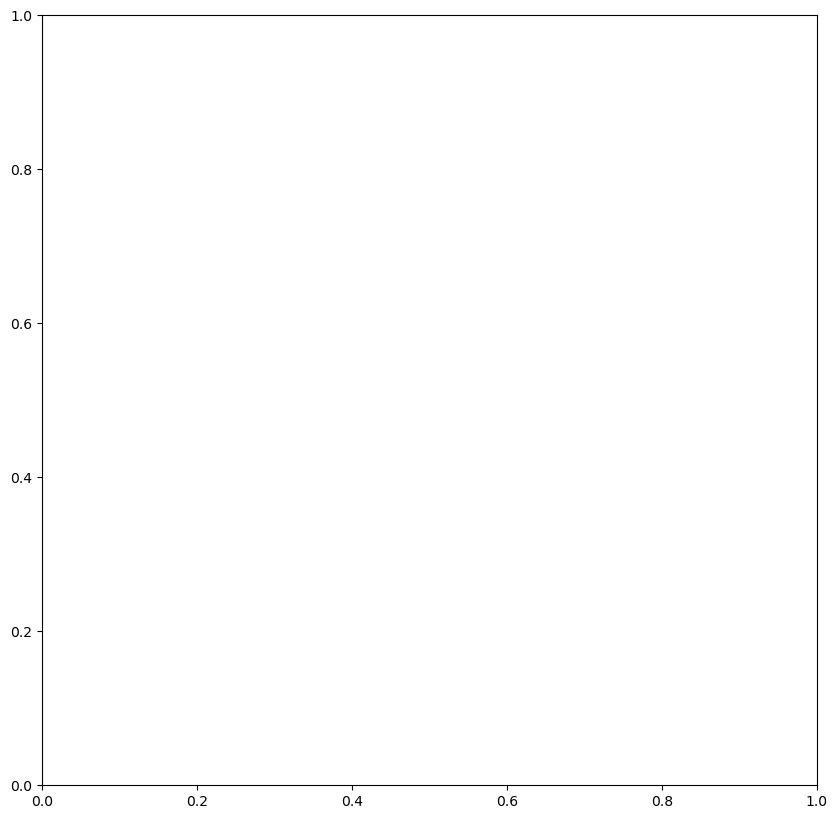

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
df_communes.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black', label='Communes')
df_mailles.plot(ax=ax, color='red', alpha=0.5, edgecolor='red', label='Mailles Safran')
plt.legend()
plt.show()

In [56]:
df_final.to_csv('df_final.csv')